# Kalman Filter
this notebook is for document our first encounter with the Kalman Filter.
there are functionalities that are not necessary for the rest of our priject.
Thoses where ment to give us intuitive understanding on the subject

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
MIN_VARIANCE = 1e-4
DELTA_T = 1.0  # Assume constant sampling rate

class KalmanFilter:
    def __init__(self):
        self.mPosition = None       # position
        self.mVelocity = None       # velocity
        self.mPx = None     # variance of position
        self.mPv = None     # variance of velocity
        self.mMeasurmentsVariance = None
        self.mProccessVariance = None
        self.mInitDone = False
    #Dror
    def InitLocationFilter(self, init_pos, init_vel, init_var, measurments_var, proccess_variance):
        self.mPosition = init_pos
        self.mVelocity = init_vel
        self.mPx = init_var
        self.mPv = init_var
        self.mMeasurmentsVariance = measurments_var
        self.mProccessVariance = proccess_variance
        self.mInitDone = True
    #Danel
    def InitHeatFilter(self,initialHeatGuess,InitialEstimationVariance,measurementNoise,ProcessNoise):
        self.EstimationHeat=initialHeatGuess
        self.EstimationVariance=InitialEstimationVariance
        self.PredictHeat=initialHeatGuess
        self.PredictVariance=InitialEstimationVariance+ProcessNoise
        self.ProcessNoise=ProcessNoise
        self.measurementNoise= measurementNoise
        self.mInitDone = True
    #Danel
    def InitLocationWithAccelerationFilter(self,initialLocationGuess,initialVelocityGuess,initialAccelerationGuess,InitialEstimationVariance,measurementNoise,ProcessNoise):
        self.EstimationLocation=initialLocationGuess
        self.EstimationVariance=InitialEstimationVariance
        self.PredictHeat=initialLocationGuess
        self.PredictVariance=InitialEstimationVariance+ProcessNoise
        self.ProcessNoise=ProcessNoise
        self.measurementNoise= measurementNoise
        self.mInitDone = True

    def GetSampelsForLocation(self, inVec):
        if not isinstance(inVec, np.ndarray):
            print("XxXxXxXxXxXxXxXxXxXxXxXxXxX")
            print("Input must be a NumPy array")
            print("XxXxXxXxXxXxXxXxXxXxXxXxXxX")
            exit()
        if not self.mInitDone:
            print("XxXxXxXxXxXxXxXxXxXxXxXxX")
            print("Must init before usage !!")
            print("XxXxXxXxXxXxXxXxXxXxXxXxX")
            exit()
        outVec = []
        outVariance=[]
        for sample in inVec:
            locationResulte, VarianceResult= self.ApplyFilterForLocationMethod(sample)
            outVec.append(locationResulte)
            outVariance.append(VarianceResult)
        return np.array(outVec), np.array(outVariance)

    def GetSampelsForHeat(self, inVec):
        if not isinstance(inVec, np.ndarray):
            print("XxXxXxXxXxXxXxXxXxXxXxXxXxX")
            print("Input must be a NumPy array")
            print("XxXxXxXxXxXxXxXxXxXxXxXxXxX")
            exit()
        if not self.mInitDone:
            print("XxXxXxXxXxXxXxXxXxXxXxXxX")
            print("Must init before usage !!")
            print("XxXxXxXxXxXxXxXxXxXxXxXxX")
            exit()
        outVecHeat = []
        outVecVariance= []
        for sample in inVec:
            heatResult, varianceResult= self.ApplyFilterForHeat(sample) 
            outVecHeat.append(heatResult)
            outVecVariance.append(varianceResult)        
        return np.array(outVecHeat), np.array(outVecVariance)

    def ApplyFilterForLocationMethod(self, measuredPos):

        # --- prediction ---
        predicted_x = self.mPosition + DELTA_T * self.mVelocity
        predicted_v = self.mVelocity
        predicted_Px = self.mPx + DELTA_T**2 * self.mPv
        predicted_Pv = self.mPv

        # --- Kalman Gains ---
        k_x = predicted_Px / (predicted_Px + self.mMeasurmentsVariance)
        k_v = predicted_Pv / (predicted_Pv + self.mMeasurmentsVariance)


        # --- Update ---
        self.mPosition = predicted_x + k_x * (measuredPos - predicted_x)
        self.mVelocity = predicted_v + k_v * ((measuredPos - predicted_x) / DELTA_T)

        self.mPx = (1 - k_x) * predicted_Px
        self.mPv = (1 - k_v) * predicted_Pv

        # Ensure minimum variances
        self.mPx = max(self.mPx, MIN_VARIANCE)
        self.mPv = max(self.mPv + self.mProccessVariance, MIN_VARIANCE)

        return self.mPosition, self.mPx 

    def ApplyFilterForLocationWithAcceleration(self, measuredPos):
        
        # --- Kalman Gains ---
        k_x = predicted_Px / (predicted_Px + self.mMeasurmentsVariance)
        k_v = predicted_Pv / (predicted_Pv + self.mMeasurmentsVariance)

        # --- Update ---
        self.mPosition = predicted_x + k_x * (measuredPos - predicted_x)
        self.mVelocity = predicted_v + k_v * ((measuredPos - predicted_x) / DELTA_T)

        self.mPx = (1 - k_x) * predicted_Px
        self.mPv = (1 - k_v) * predicted_Pv

        # Ensure minimum variances
        self.mPx = max(self.mPx, MIN_VARIANCE)
        self.mPv = max(self.mPv + self.mProccessVariance, MIN_VARIANCE)

         # --- prediction ---
        predicted_x = self.mPosition + DELTA_T * self.mVelocity
        predicted_v = self.mVelocity
        predicted_Px = self.mPx + DELTA_T**2 * self.mPv
        predicted_Pv = self.mPv

        return self.mPosition

    def ApplyFilterForHeat(self, measuredPos):

        # --- Kalman Gains ---
        KalmanGain= (self.PredictVariance/(self.PredictVariance+self.measurementNoise))

        # --- Update ---
        self.EstimationHeat= self.PredictHeat+KalmanGain*(measuredPos-self.PredictHeat)
        self.EstimationVariance= (1-KalmanGain)*self.PredictVariance

        # --- Predict ---
        self.PredictHeat=self.EstimationHeat
        self.PredictVariance= self.EstimationVariance+self.ProcessNoise

        return self.EstimationHeat, self.EstimationVariance


### Example 7 and 8 form the book
using a non perfect model of calculate the temperatue in a liquid

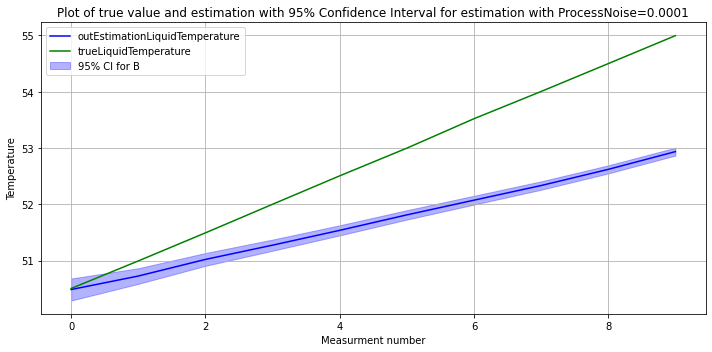

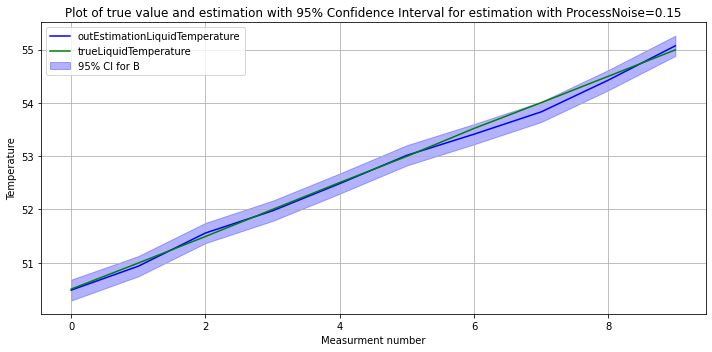

In [34]:
#-------------------------------------------------------exercise 7---------------------------------------------------------------

#initil the Kalman Filter
FilterHeat=KalmanFilter()
FilterHeat.InitHeatFilter(initialHeatGuess=10, InitialEstimationVariance=10000, measurementNoise=0.01,  ProcessNoise=0.0001)
trueLiquidTemperature=np.array([ 50.505,50.994, 51.493, 52.001, 52.506, 52.998, 53.521, 54.005, 54.5, 54.997])
MeasurmentLiuidTemperature=np.array([ 50.486, 50.963, 51.597, 52.001, 52.518,53.05, 53.438, 53.858, 54.465, 55.114])

#get the results
outEstimationLiquidTemperature, outEstimationVariance = FilterHeat.GetSampelsForHeat(MeasurmentLiuidTemperature)


# --- 95% Confidence intervals (±1.96 * std) ---
ci = 1.96  * np.sqrt(outEstimationVariance)

x=np.arange(len(trueLiquidTemperature))
# Plot
plt.figure(1,figsize=(10, 5))
plt.plot(x, outEstimationLiquidTemperature, label='outEstimationLiquidTemperature', color='blue')
plt.plot(x, trueLiquidTemperature, label='trueLiquidTemperature', color='green')  # assuming A is also a y-vector to compare
plt.fill_between(x, outEstimationLiquidTemperature - ci, outEstimationLiquidTemperature + ci, color='blue', alpha=0.3, label='95% CI for B')

plt.xlabel("Measurment number")
plt.ylabel("Temperature")
plt.title("Plot of true value and estimation with 95% Confidence Interval for estimation with ProcessNoise=0.0001")
plt.legend()
plt.grid(True)
plt.tight_layout()

#-------------------------------------------------------exercise 8---------------------------------------------------------------

FilterHeat.InitHeatFilter(initialHeatGuess=10, InitialEstimationVariance=10000, measurementNoise=0.01,  ProcessNoise=0.15)
outEstimationLiquidTemperature, outEstimationVariance= FilterHeat.GetSampelsForHeat(MeasurmentLiuidTemperature)

# --- 95% Confidence intervals (±1.96 * std) ---
ci = 1.96  * np.sqrt(outEstimationVariance)
x=np.arange(len(trueLiquidTemperature))

# Plot
plt.figure(2,figsize=(10, 5))
plt.plot(x, outEstimationLiquidTemperature, label='outEstimationLiquidTemperature', color='blue')
plt.plot(x, trueLiquidTemperature, label='trueLiquidTemperature', color='green')  # assuming A is also a y-vector to compare
plt.fill_between(x, outEstimationLiquidTemperature - ci, outEstimationLiquidTemperature + ci, color='blue', alpha=0.3, label='95% CI for B')

plt.xlabel("Measurment number")
plt.ylabel("Temperature")
plt.title("Plot of true value and estimation with 95% Confidence Interval for estimation with ProcessNoise=0.15")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## trying to follow a movment of an object with constatns velocity

We can see that the variance estimation is shrinking 
 [2.14707243 2.16295727 2.14064749 2.11419172 2.09184168 2.07475256
 2.06222452 2.05323195 2.04685282 2.0423597  2.03920929 2.03700693]


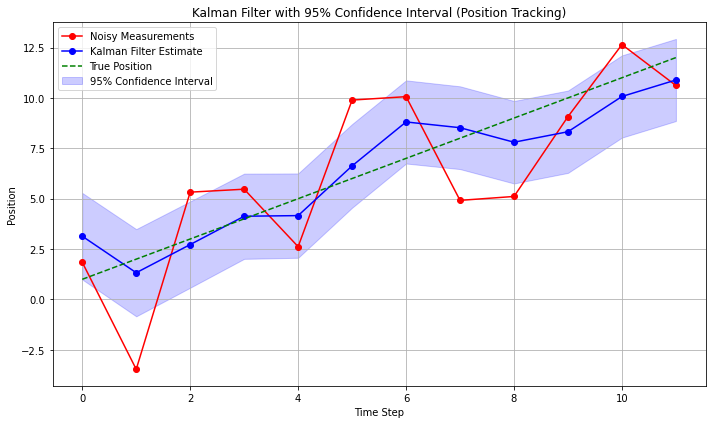

In [35]:
#adding a normal destrebition noise with mu=3
measurment_noise = np.random.normal(0, 3, 12)

#the position of the object every secnond
ideal_position = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

#initial the Kalman Filter
Filter = KalmanFilter()
Filter.InitLocationFilter(init_pos=2, init_vel=2, init_var=1, measurments_var=3, proccess_variance=0.1)

#get the results
sample=measurment_noise + ideal_position
outVec,outVar = Filter.GetSampelsForLocation(sample)

# --- 95% Confidence intervals (±1.96 * std) ---
ci = 1.96  * np.sqrt(outVar)
x = np.arange(len(sample))
print("We can see that the variance estimation is shrinking \n",ci)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, sample, 'ro-', label="Noisy Measurements")
plt.plot(x, outVec, 'bo-', label="Kalman Filter Estimate")
plt.plot(x, ideal_position, 'g--', label="True Position")
plt.fill_between(x, outVec - ci, outVec + ci, color='blue', alpha=0.2, label="95% Confidence Interval")

plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Kalman Filter with 95% Confidence Interval (Position Tracking)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()